<span><h1 style="color:#4987FF">
Profiling
</h1></span>

## Assume that you have: 

* made your computational model
* realised it's too slow to be useful
* realised you have to speed it up


## How do you know what parts to speed up?

## Answer: 
### Run it with a profiler;
### Record -
* How many times a line is run / 
* How long each line runs for on average / 
* Even more technical things like CPU/GPU usage

### Then, identify where the main bottleneck(s) in the code are, and focus on improving them first

In [1]:
"""
There's a good few different profilers available to play with,
we'll only be looking at a few of them in this talk though;
"""

# 1st) timeit - 
# Pros: built-in, provides accurate run-time-lengths of functions, runs several times and averages, easy to use
# Cons: doesn't give line-by-line results, only overall time taken
# Installation: not needed, built-in

# Note: can be used as a normal python function, or with Jupyter magic

import timeit

In [45]:
"""
This is just an example function to profile,
Basic (non-optimised) Simpson's Rule implementation for numerical integration
"""
import numpy as np
def integrate(func, lower, upper, num_sections=200):
    running_total = 0
    section_width = (upper-lower)/num_sections
    for sec in range(0,num_sections - 1):
        lower_bound_sec = func(lower + section_width*sec)
        upper_bound_sec = func(lower + section_width*(sec + 1))
        running_total += section_width*np.mean([lower_bound_sec,upper_bound_sec])
    return running_total

#test:
print(integrate(np.cos, 0, 5, 500))
print(np.sin(5) - np.sin(0)) # Analytic solution

-0.9617048891392411
-0.9589242746631385


In [7]:
%timeit integrate(np.cos, 0, 5, 500)

10 loops, best of 3: 44.1 ms per loop


In [9]:
# That's decently fast, but we only got it accurate to 1 decimal place. Let's try it for 5000 sections;
print(integrate(np.cos, 0, 5, 5000))
%timeit integrate(np.cos, 0, 5, 5000)

-0.9592073774052724
1 loop, best of 3: 404 ms per loop


In [10]:
# Note that timeit detected it now took longer to run, and so changed how many times it ran to take the average.
# Also, not shown here, but if there are statistically significant differences in times of re-runs of the 
# function, it will alert you, and provide guesses as to why.

# It tries to guess for us, so we don't spend too long waiting on timeit to re-run the function, 
# but we can also directly tell it how many times to take an average over, and how many times to 
# take an average;

%timeit -n1 -r1 integrate(np.cos, 0, 5, 500)
%timeit -n1 -r5 integrate(np.cos, 0, 5, 500)
%timeit -n5 -r1 integrate(np.cos, 0, 5, 500)

1 loop, best of 1: 64.5 ms per loop
1 loop, best of 5: 46.4 ms per loop
5 loops, best of 1: 47.7 ms per loop


In [12]:
# 2nd) heat profiler -
# Pros: 'colour' representation for ease of reading, line-by-line, easy to use
# Cons: not built-in (although free & open-source), hard to see exact times due to colour representation
# Installation: "pip install py-heat-magic" [source: https://github.com/csurfer/pyheatmagic]

# Note: Jupyter magic only (I think)

%load_ext heat 
# Jupyter magic import (effectively, kind of)

# Usage Note: You'll need to run %%heat in it's own cell, and everything used in the cell must be defined in it

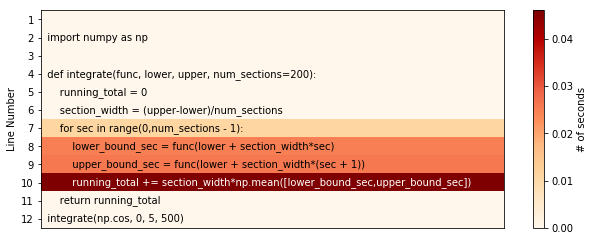

In [16]:
%%heat

import numpy as np

def integrate(func, lower, upper, num_sections=200):
    running_total = 0
    section_width = (upper-lower)/num_sections
    for sec in range(0,num_sections - 1):
        lower_bound_sec = func(lower + section_width*sec)
        upper_bound_sec = func(lower + section_width*(sec + 1))
        running_total += section_width*np.mean([lower_bound_sec,upper_bound_sec])
    return running_total
integrate(np.cos, 0, 5, 500)

In [43]:
# 3rd) line_profiler - 
# Pros: can be used as Python function/Jupyter magic/from command-line, provides info on everything
# Cons: not built-in (although free & open-source), information a little dense / hard to read, usage not simple
#Installation: pip install line_profiler [source: https://github.com/rkern/line_profiler]

from line_profiler import LineProfiler

%load_ext line_profiler
# To use as Jupyter magic

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [48]:
# Run %lprun? on its own for full guide for Jupyter magic usage

params = [np.cos, 0, 5, 500]

lp = LineProfiler()
lp_wrapper = lp(integrate) # make profiler object
lp_wrapper(*params) # profile the function with specified parameters (note, using list unpacking)
lp.print_stats() # show the results

Timer unit: 4.1053e-07 s

Total time: 0.117314 s
File: <ipython-input-45-e9aab0e4c5f1>
Function: integrate at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def integrate(func, lower, upper, num_sections=200):
     7         1         13.0     13.0      0.0      running_total = 0
     8         1         14.0     14.0      0.0      section_width = (upper-lower)/num_sections
     9       500       6327.0     12.7      2.2      for sec in range(0,num_sections - 1):
    10       499      25371.0     50.8      8.9          lower_bound_sec = func(lower + section_width*sec)
    11       499      19551.0     39.2      6.8          upper_bound_sec = func(lower + section_width*(sec + 1))
    12       499     234481.0    469.9     82.1          running_total += section_width*np.mean([lower_bound_sec,upper_bound_sec])
    13         1          5.0      5.0      0.0      return running_total

